**Taller de Geofísica – Gravimetría y Magnetometría (Grav-Mag)**

*Ana María Valencia Londoño*

*Kevin Villegas Tamayo*

**1.** Se tienen dos puntos (sitios) de un mismo conjunto de datos con medidas de aceleración
de la gravedad, como se muestra en la siguiente tabla:

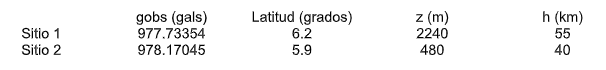

Donde gobs es la gravedad observada (medida), z es la altura sobre el nivel del mar del sitio
de medida, y h es la profundidad de la raíz cortical con respecto al nivel del mar.

**a)** Calcular el valor de la anomalía gravitacional **(gobs – gn)** para los dos sitios de medida.

**gn =** 978.03185*(1 + 0.005278895*sen 2 (latitud) + 0.000023462*sen 4 (latitud))
(esta ecuación da el valor de gn en gals)

In [4]:
import math

#Sitio 1
gobs1 = 977.73354

lat1 = math.radians(6.2)
gn1 = 978.03185*(1 + 0.005278895*(math.sin(lat1))**2 + 0.000023462*(math.sin(lat1)**4))

agrav1 = gobs1-gn1

#print(gn1)
print("Anomalía Gravitacional 1 =", agrav1, "gal")

#Sitio 2
gobs2 = 978.17045

lat2 = math.radians(5.9)
gn2 = 978.03185*(1 + 0.005278895*(math.sin(lat2))**2 + 0.000023462*(math.sin(lat2)**4))

agrav2 = gobs2-gn2

#print(gn2)
print("Anomalía Gravitacional 2 =", agrav2, "gal")

Anomalía Gravitacional 1 = -0.3585327889660448 gal
Anomalía Gravitacional 2 = 0.08404436883688504 gal


**b)** Calcular la anomalía de aire libre en los dos sitios de medida.

**Correccion_airelibre =** -0.3086z – 0.00023zCos(latitud) + 0.00000002z2


(si z se expresa en metros, esta corrección da en miligals [mgal])


Y la anomalía se calcula así:


**deltag_airelibre =** (gobs-gn) + Correccion_airelibre

In [5]:
#Sitio 1
corraire1 = -0.3086*(2.24) - 0.00023*(2.24)*math.cos(lat1) + (0.00000002*(2.24)**2)
aaire1 = agrav1 + corraire1
print("Anomalía de aire libre 1 =", aaire1, "gal")

#Sitio 2
corraire2 = -0.3086*(0.48) - 0.00023*(0.48)*math.cos(lat2) + (0.00000002*(0.48)**2)
aaire2 = agrav2 + corraire2
print("Anomalía de aire libre 2 =", aaire2, "gal")

Anomalía de aire libre 1 = -1.0503088751906833 gal
Anomalía de aire libre 2 = -0.06419344174612468 gal


**c)** Asumiendo que el terreno en los sitios de medida y sus vecindades es plano, calcular la
anomalía de Bouguer en los dos sitios, asumiendo una densidad de 2.67 g/cm 3 (2670 kg/m³).

**Correccion_Bouguer =** 2*pi*z*densidad*G


Donde G es la constante de gravitación universal (constante de Cavendish). Si se usan
unidades del sistema internacional, la corrección da en m/s 2 (recordar que 1 m/s 2 = 10 5 mgal
= 10 2 gal).


Y la anomalía se calcula así:


**deltag_bouguer =** deltag_airelibre – Correccion_Bouguer

In [6]:
G = 0.000000000066743
densidad = 2670

#Sitio 1
corrbug1 = 2*math.pi*(2240)*densidad*G #m/s2
#print(corrbug1)
#print(corrbug1*100)
print("Anomalía de Bouguer 1 =", aaire1 - (corrbug1*100), "gal")

#Sitio 2
corrbug2 = 2*math.pi*(480)*densidad*G #m/s2
#print(corrbug2*100)
print("Anomalía de Bouguer 2 =", aaire2 - (corrbug2*100), "gal")

Anomalía de Bouguer 1 = -1.301118888781978 gal
Anomalía de Bouguer 2 = -0.11793844465854496 gal


**d)** Calcular la corrección isostática y la anomalía isostática para el sitio 1 (que es el que tiene
la raíz cortical más profunda), de modo que con las medidas corregidas, ambos sitios
quedaran como si tuvieran una raíz cortical igualmente profunda.

Esto se puede hacer calculando la atracción gravitacional de un cilindro vertical cuyo tope
estuviera a una profundidad de 40 km (h del sitio 2, llamémoslo h 2 ) y cuya base estuviera a
una profundidad de 55 km (h del sitio 1, llamémoslo h 1 ), y cuya densidad fuera el contraste
entre la densidad del manto (aprox. 3050 kg/m³) y la densidad de la corteza (aprox. 2670
kg/m³), de modo que delta_densidad = densidad_corteza – densidad_manto

**Correccion_isostatica =** 2*pi*G*delta_densidad*(h 1 -h 2 +sqrt(r 2 +h 2 2 )-sqrt(r 2 +h 1 2 ))
Donde r es el radio del cilindro. En nuestro caso lo podemos asumir como 10 km (10000 m),
siendo aproximadamente un radio representativo de las medidas tomadas). Si se usan
unidades del sistema internacional, las unidades de la corrección quedarían en m/s 2 .

De modo que para el sitio 1:

**deltag_iostatico =** deltag_bouguer + Correccion_isostatica

In [7]:
delta_densidad = 2670 - 3050
corisost = 2*math.pi*G*delta_densidad*(55000 - 40000 + math.sqrt((10000)**2 + (40000)**2 ) - math.sqrt((10000)**2 + (55000)**2 ))
#print(corisost*100)

print("Anomalía isostática =", (aaire1 - (corrbug1*100)) + corisost*100, "gal")

Anomalía isostática = -1.306367396591066 gal


**2.** Se tienen los siguientes datos a lo largo de un perfil gravimétrico asociado a un cuerpo esférico (o equidimensional) subterráneo.

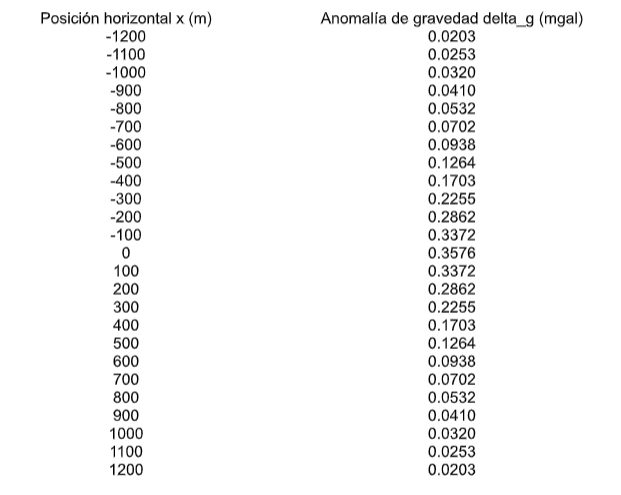

**a)** Graficar delta_g vs x

In [9]:
import matplotlib.pyplot as plt

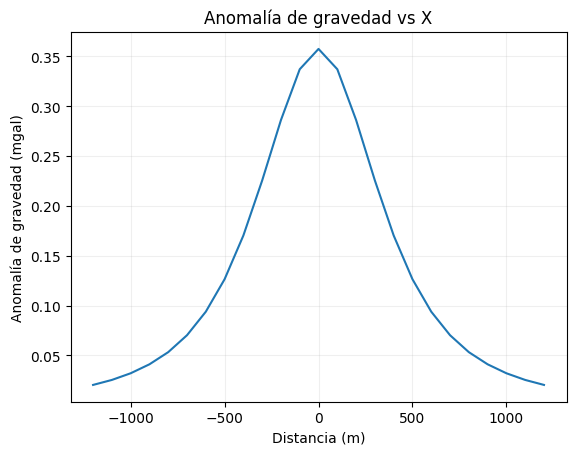

In [10]:
deltag = [0.0203, 0.0253, 0.0320, 0.0410, 0.0532, 0.0702, 0.0938, 0.1264, 0.1703, 0.2255, 0.2862, 0.3372, 0.3576, 0.3372,
          0.2862, 0.2255, 0.1703, 0.1264, 0.0938, 0.0702, 0.0532, 0.0410, 0.0320, 0.0253, 0.0203]

poshor = [-1200, -1100, -1000, -900, -800, -700, -600, -500, -400, -300, -200, -100, 0, 100, 200, 300, 400, 500, 600, 700,
          800, 900, 1000, 1100, 1200]

# Crear el gráfico
#plt.figure(figsize=(5, 5))
plt.plot(poshor, deltag)

# Etiquetas de los ejes y leyenda
plt.xlabel('Distancia (m)')
plt.ylabel('Anomalía de gravedad (mgal)')
#plt.legend()

# Título del gráfico
plt.title('Anomalía de gravedad vs X')

# Mostrar el gráfico
plt.grid(True, which='both', alpha=0.2)
plt.show()

**b)** Estimar la profundidad del centro de la esfera (z) utilizando el método de la mitad del máximo.

In [11]:
gmax = max(deltag)
gmax2 = gmax/2
print(gmax2)

0.1788


In [12]:
def interpolacion_lineal(x, x1, y1, x2, y2):
    """
    Realiza interpolación lineal para encontrar el valor de y correspondiente a un punto x dado
    entre los puntos (x1, y1) y (x2, y2).

    :param x: Punto x para el que se desea encontrar el valor de y.
    :param x1: Coordenada x del primer punto conocido.
    :param y1: Coordenada y del primer punto conocido.
    :param x2: Coordenada x del segundo punto conocido.
    :param y2: Coordenada y del segundo punto conocido.
    :return: Valor interpolado de y.
    """
    y = y1 + ((x - x1) / (x2 - x1)) * (y2 - y1)
    return y

# Ejemplo de uso
x1 = 0.1703
y1 = -400
x2 = 0.2255
y2 = -300

# Punto x para el que queremos interpolar
x_interpolado = gmax2

# Interpolación lineal
y_interpolado = interpolacion_lineal(x_interpolado, x1, y1, x2, y2)

print("La profundidad del centro de la esfera (Z) es", 1.305*(y_interpolado*-1), "m")

La profundidad del centro de la esfera (Z) es 501.90489130434787 m


**c)** Usando el resultado del numeral b, tomando el valor máximo de delta_g y haciendo x igual a cero, calcular el radio de la esfera (R) para un delta_densidad = 150 kg/m³ y para un delta_densidad = 400 kg/m³ (con el delta_densidad me refiero al contraste de densidad entre el material de la esfera y lo que la rodea).

**delta_g =** (4*pi*G*R 3 *delta_densidad*z)/(3*(x 2 +z 2 ) 1.5 )

Recuerde que si usa unidades del sistema internacional, el delta_g le da en unidades de
aceleración en m/s 2

In [13]:
#Despejamos R

x=0
delta_densidadA = 150
delta_densidadB = 400
z = 1.305*(y_interpolado*-1)

RA = ((gmax*(3*(((x)**2+(z)**2)**1.5)))/(4*math.pi*G*delta_densidadA*z))**(1/3)

RB = ((gmax*(3*(((x)**2+(z)**2)**1.5)))/(4*math.pi*G*delta_densidadB*z))**(1/3)

print("Para 150 kg/m3, el radio de la esfera es", RA, "m")
print("Para 400 kg/m3, el radio de la esfera es", RB, "m")

Para 150 kg/m3, el radio de la esfera es 12902.828498778705 m
Para 400 kg/m3, el radio de la esfera es 9304.549429056886 m


**3.** Se tienen los siguientes datos de componente vertical de campo magnético (Za,
expresado en nano-teslas) a lo largo de un perfil magnetométrico asociado a un cuerpo magnetizado que se puede aproximar a un monopolo.

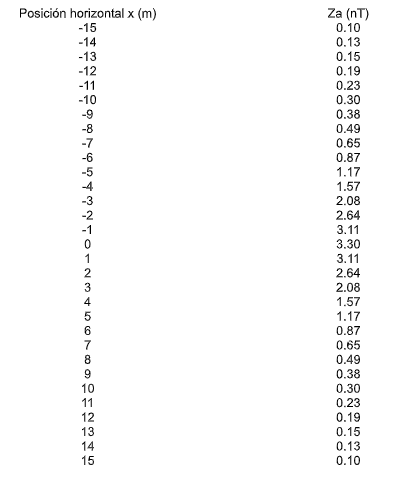

**a)** Graficar Za vs x.

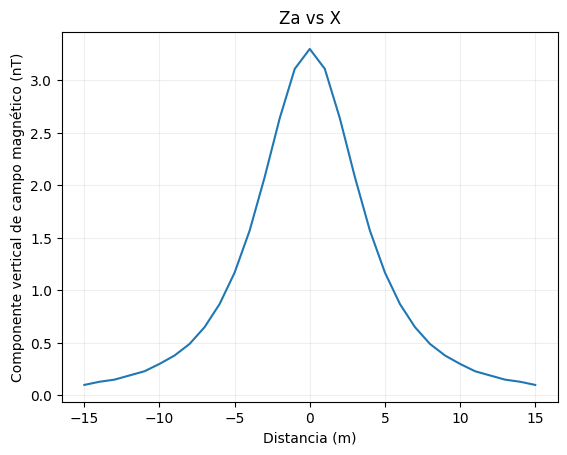

In [14]:
Za = [0.10, 0.13, 0.15, 0.19, 0.23, 0.30, 0.38, 0.49, 0.65, 0.87, 1.17, 1.57, 2.08, 2.64, 3.11, 3.30, 3.11, 2.64, 2.08, 1.57,
          1.17, 0.87, 0.65, 0.49, 0.38, 0.30, 0.23, 0.19, 0.15, 0.13, 0.10]

poshor = [-15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,15]

# Crear el gráfico
#plt.figure(figsize=(5, 5))
plt.plot(poshor, Za)

# Etiquetas de los ejes y leyenda
plt.xlabel('Distancia (m)')
plt.ylabel('Componente vertical de campo magnético (nT)')
#plt.legend()

# Título del gráfico
plt.title('Za vs X')

# Mostrar el gráfico
plt.grid(True, which='both', alpha=0.2)
plt.show()

**b)** Estimar la profundidad del tope del monopolo (z) utilizando el método de la mitad del máximo.

In [15]:
zamax = max(Za)
zamax2 = zamax/2

print(zamax)
print(zamax2)

3.3
1.65


In [16]:
def interpolacion_lineal(x, x1, y1, x2, y2):
    """
    Realiza interpolación lineal para encontrar el valor de y correspondiente a un punto x dado
    entre los puntos (x1, y1) y (x2, y2).

    :param x: Punto x para el que se desea encontrar el valor de y.
    :param x1: Coordenada x del primer punto conocido.
    :param y1: Coordenada y del primer punto conocido.
    :param x2: Coordenada x del segundo punto conocido.
    :param y2: Coordenada y del segundo punto conocido.
    :return: Valor interpolado de y.
    """
    y = y1 + ((x - x1) / (x2 - x1)) * (y2 - y1)
    return y

# Ejemplo de uso
x1 = 1.57
y1 = -4
x2 = 2.08
y2 = -3

# Punto x para el que queremos interpolar
x_interpolado = zamax2

# Interpolación lineal
y_interpolado = interpolacion_lineal(x_interpolado, x1, y1, x2, y2)

#print(y_interpolado)

print("La profundidad del tope del monopolo (Z) es", (y_interpolado*-1)/0.766, "m")

La profundidad del tope del monopolo (Z) es 5.017150463318487 m


**c)** Usando el resultado del numeral b, estimar el área transversal (A) del monopolo, usando el valor máximo de Za y haciendo x igual a cero.

**Za =** (z*k*Fe*A) / (x 2 +z 2 ) 1.5

Asuma que la susceptibilidad magnética k es 0.003 (adimensional) y que el campo magnético
planetario Fe es 55000 nT.

In [17]:
#Despejamos A

k = 0.003
Fe = 55000
z = (y_interpolado*-1)/0.766
x = 0

A = (zamax*((x)**2 + (z**2))**1.5)/(z*k*Fe)
print("El área transversal es", A, "m2")

El área transversal es 0.5034359754315381 m2


**4.** Se tiene un estrato horizontal magnetizado, limitado lateralmente, como se muestra en la
figura. Calcular el valor de la anomalía magnética en el punto P. Suponga que el campo
magnético planetario en el sitio de medida apunta hacia abajo y tiene un valor de 50000 nT y
asuma la susceptibilidad magnética como 0.003.

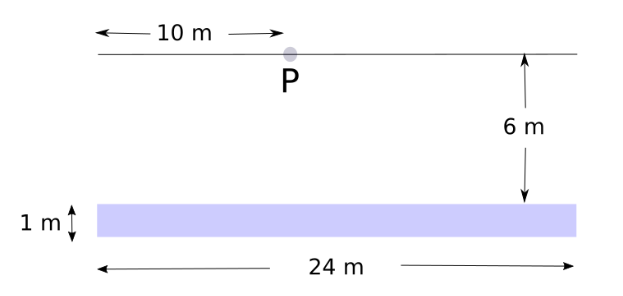

In [18]:
#Intensidad
k = 0.003
Fe = 50000
i = k*Fe

#thetas

#theta1
theta1a = math.atan(10/6)
theta1b = math.atan(14/6)
theta1 = (theta1a + theta1b)

#theta2
theta2a = math.atan(10/7)
theta2b = math.atan(14/7)
theta2 = (theta2a + theta2b)

"""
print(math.degrees(theta1))
print(math.degrees(theta2))
print(theta1)
print(theta2)
"""

Za = 2*i*(theta1 - theta2)
print("La anomalía magnética Za en el punto P es", Za, "nT")

La anomalía magnética Za en el punto P es 38.71868605030415 nT


**5.** Haga la curva de deriva para los siguientes datos y haga las correcciones del caso
(reporte la lectura corregida para las 4 estaciones GN). Convierta los datos corregidos a
miligals. Los datos se recolectaron con un gravímetro en donde cada división equivale a
0.0869 miligals.

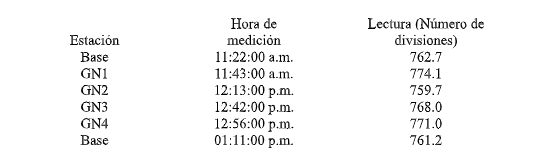

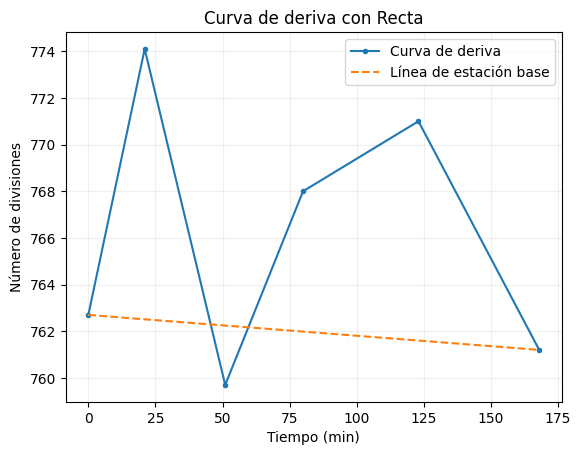

In [45]:
# Coordenadas de dos puntos en la recta
x1, y1 = 0, 762.7
x2, y2 = 168, 761.2

# Calcular la pendiente (m) y la ordenada al origen (b) de la recta
m = (y2 - y1) / (x2 - x1)
b = y1 - m * x1

# Generar puntos en la recta
recta_x = [min(tiempo), max(tiempo)]
recta_y = [m * x + b for x in recta_x]

# Graficar la curva y la recta
plt.plot(tiempo, divisiones, marker='.', label='Curva de deriva')
plt.plot(recta_x, recta_y, linestyle='--', label='Línea de estación base')

# Etiquetas de los ejes y leyenda
plt.xlabel('Tiempo (min)')
plt.ylabel('Número de divisiones')
plt.legend()

# Título del gráfico
plt.title('Curva de deriva con Recta')

# Mostrar el gráfico
plt.grid(True, which='both', alpha=0.2)
plt.show()

In [62]:
# Coordenadas de dos puntos en la recta
x1, y1 = 0, 762.7
x2, y2 = 168, 761.2

# Calcular la pendiente (m) y la ordenada al origen (b) de la recta
m = (y2 - y1) / (x2 - x1)
b = y1 - m * x1

# Calcular el valor de y para un nuevo valor de x
valor = []
for i in range(0,6):
  nuevo_x =  tiempo[i] # Cambia este valor según tus necesidades
  nuevo_y = m * nuevo_x + b
  valor.append(nuevo_y)

#print(divisiones)
#print(valor)

diferencia = []
for i in range(0,6):
  b = divisiones[i]-valor[i]
  diferencia.append(b)

#print(diferencia)

corregido = []
corregidomg = []
for i in range(0,6):
  a = divisiones[i]+diferencia[i]
  corregido.append(a)
  corregidomg.append(a*0.0869)
print("La lectura corregida, de primera a última medición, es:")
print(corregido)
print()
print("La lectura corregida en mgals, de primera a última medición, es:")
print(corregidomg)

La lectura corregida, de primera a última medición, es:
[762.7, 785.6875, 757.1553571428572, 774.0142857142856, 780.3982142857143, 761.2]

La lectura corregida en mgals, de primera a última medición, es:
[66.27863, 68.27624375, 65.7968005357143, 67.26184142857143, 67.81660482142857, 66.14828000000001]


**6.** Los siguientes datos representan un perfil gravimétrico que pasa por una transecta que
pasa por encima de un cuerpo aproximadamente equidimensional. La anomalía debida al
cuerpo está enmascarada por una anomalía regional. Remueva la anomalía regional y
grafique la anomalía local asociada al cuerpo.

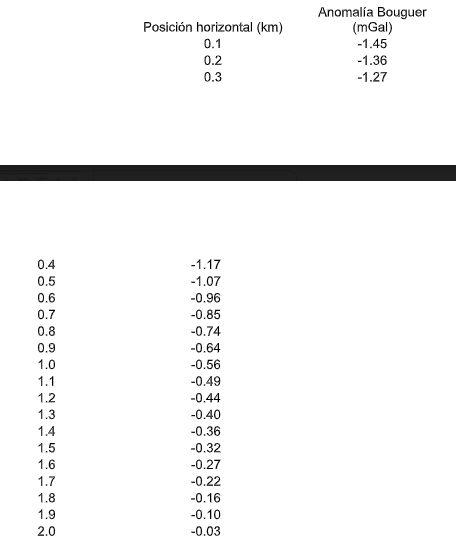

In [28]:
posh1 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]
anbug1 = [-1.45, -1.36, -1.27, -1.17, -1.07, -0.96, -0.85, -0.74, -0.64, -0.56, -0.49, -0.44, -0.40, -0.36,
         -0.32, -0.27, -0.22, -0.16, -0.10, -0.03]

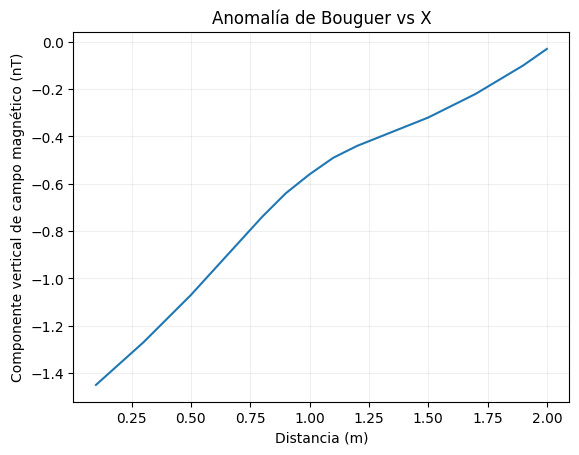

In [29]:
# Crear el gráfico
#plt.figure(figsize=(5, 5))
plt.plot(posh1, anbug1)

# Etiquetas de los ejes y leyenda
plt.xlabel('Distancia (m)')
plt.ylabel('Componente vertical de campo magnético (nT)')
#plt.legend()

# Título del gráfico
plt.title('Anomalía de Bouguer vs X')

# Mostrar el gráfico
plt.grid(True, which='both', alpha=0.2)
plt.show()

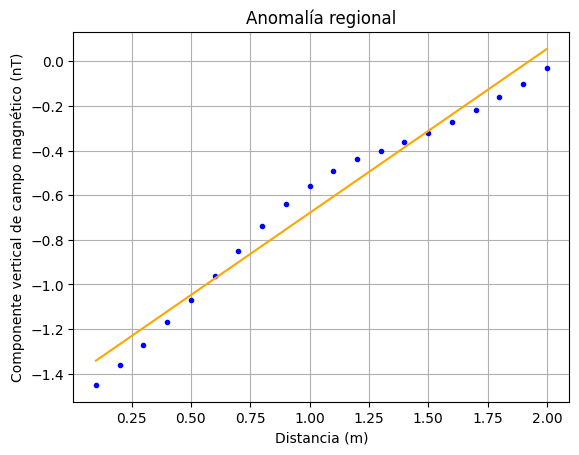

In [30]:
import numpy as np

fig2 = plt.figure()
ax = fig2.add_subplot(111)
ax.plot(posh, anbug, marker='.', linestyle = ' ', color='blue')

#Hagamos regresión

posh = np.array(posh1)
anbug = np.array(anbug1)

mean_posh = np.mean(posh)
mean_anbug = np.mean(anbug)
n = len(posh)
numer = np.sum((posh - mean_posh) * (anbug - mean_anbug))
denom = np.sum((posh - mean_posh) ** 2)
m = numer / denom
b = mean_anbug - (m * mean_posh)

# Calcular los valores ajustados de y (y_pred)
y_pred = m * posh + b


# Imprimir la pendiente y la intersección
#print("Pendiente od (m):", m)
#print("Intersección od (b):", b)


plt.plot(posh, y_pred, color="orange", label="Recta de Regresión")


ax.set_xlabel('Distancia (m)')
ax.set_ylabel('Componente vertical de campo magnético (nT)')

ax.set_title('Anomalía regional')
#ax.set_xlim((0, 45))
#ax.set_ylim((0, 90))
ax.grid(True)

plt.show()

In [32]:
#Calculamos el valor del campo magnético, para cada posición horizontal, en la anomalía regiional
values = []
for i in posh1:
  y_pred = m * i + b
  values.append(y_pred)
#print(values)

In [34]:
anomgen = []
for j in range(0, 20):
  a=anbug[j]-values[j]
  anomgen.append(a)
#print(anomgen)

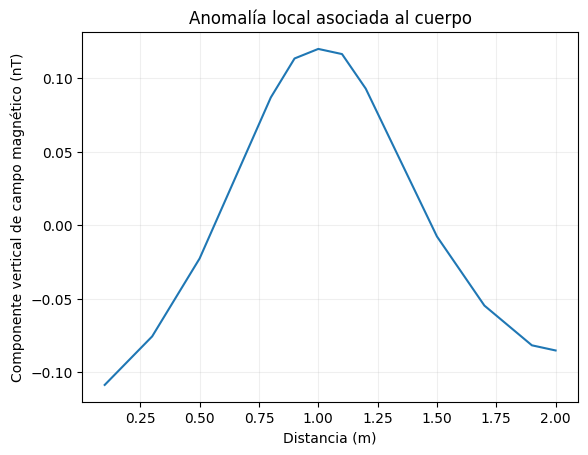

In [36]:
plt.plot(posh1, anomgen)

# Etiquetas de los ejes y leyenda
plt.xlabel('Distancia (m)')
plt.ylabel('Componente vertical de campo magnético (nT)')
#plt.legend()

# Título del gráfico
plt.title('Anomalía local asociada al cuerpo')

# Mostrar el gráfico
plt.grid(True, which='both', alpha=0.2)
plt.show()